# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
CitiesDF = pd.DataFrame(np.array(cities))
WeahterPy_Columns = ["City", "Cloudiness","Country",
                "Date","Humidity","Lat",
                "Long", "Max Temp", "Wind Speed"]
WeatherPy_CitiesDF = pd.DataFrame(columns=WeahterPy_Columns)

url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in CitiesDF.iterrows():
    target_city = row[0]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        WeatherPy_CitiesDF.set_value(index, "City", city_data["name"])
        WeatherPy_CitiesDF.set_value(index, "Cloudiness", city_data["clouds"]["all"])
        WeatherPy_CitiesDF.set_value(index, "Country", city_data["sys"]["country"])
        WeatherPy_CitiesDF.set_value(index, "Date", city_data["dt"])
        WeatherPy_CitiesDF.set_value(index, "Humidity", city_data["main"]["humidity"])
        WeatherPy_CitiesDF.set_value(index, "Lat", city_data["coord"]["lat"])
        WeatherPy_CitiesDF.set_value(index, "Long", city_data["coord"]["lon"])
        WeatherPy_CitiesDF.set_value(index, "Max Temp", city_data["main"]["temp"])
        WeatherPy_CitiesDF.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        
        print("Proceesing: Record " , row_count,"of set", set_count, ' |' , city_data["name"])
        row_count += 1
        if row_count % 50 == 0:
            time.sleep(60)
            set_count += 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------


C:\Users\Dustin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Dustin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Dustin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Dustin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Dustin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future

Proceesing: Record  1 of set 1  | East London
Proceesing: Record  2 of set 1  | Mar del Plata
Proceesing: Record  3 of set 1  | Bluff
Proceesing: Record  4 of set 1  | Saskylakh
Proceesing: Record  5 of set 1  | Jumla
Proceesing: Record  6 of set 1  | Nargana
Proceesing: Record  7 of set 1  | Ushuaia
Proceesing: Record  8 of set 1  | Banepa
Proceesing: Record  9 of set 1  | Meulaboh
Proceesing: Record  10 of set 1  | Mecca
Proceesing: Record  11 of set 1  | Westport
Proceesing: Record  12 of set 1  | Pevek
Proceesing: Record  13 of set 1  | Kapaa
Proceesing: Record  14 of set 1  | Bredasdorp
Proceesing: Record  15 of set 1  | PEMEX
Proceesing: Record  16 of set 1  | Kpandae
Proceesing: Record  17 of set 1  | Provideniya
Proceesing: Record  18 of set 1  | Barrow
Proceesing: Record  19 of set 1  | Mataura
Proceesing: Record  20 of set 1  | The Valley
City not found, skipping...
Proceesing: Record  21 of set 1  | Albany
Proceesing: Record  22 of set 1  | Jamestown
Proceesing: Record  23 o

Proceesing: Record  174 of set 4  | Wajima
Proceesing: Record  175 of set 4  | Ibra
City not found, skipping...
Proceesing: Record  176 of set 4  | Ponta do Sol
Proceesing: Record  177 of set 4  | Griffith
Proceesing: Record  178 of set 4  | Souillac
Proceesing: Record  179 of set 4  | Sanford
Proceesing: Record  180 of set 4  | Hovd
Proceesing: Record  181 of set 4  | Elliot Lake
Proceesing: Record  182 of set 4  | Lebu
City not found, skipping...
Proceesing: Record  183 of set 4  | Hasaki
City not found, skipping...
Proceesing: Record  184 of set 4  | Jever
Proceesing: Record  185 of set 4  | Ulaangom
City not found, skipping...
Proceesing: Record  186 of set 4  | Codrington
Proceesing: Record  187 of set 4  | Marrakesh
Proceesing: Record  188 of set 4  | Zhuhai
Proceesing: Record  189 of set 4  | Ribeira Grande
Proceesing: Record  190 of set 4  | Te Anau
Proceesing: Record  191 of set 4  | Ketchikan
Proceesing: Record  192 of set 4  | Tura
Proceesing: Record  193 of set 4  | Alofi
C

Proceesing: Record  346 of set 7  | Angoche
Proceesing: Record  347 of set 7  | Dudinka
Proceesing: Record  348 of set 7  | Inhambane
Proceesing: Record  349 of set 7  | Iqaluit
Proceesing: Record  350 of set 8  | Krasnogvardeyets
Proceesing: Record  351 of set 8  | Catuday
Proceesing: Record  352 of set 8  | Gizo
Proceesing: Record  353 of set 8  | Araripe
Proceesing: Record  354 of set 8  | Huangchuan
City not found, skipping...
Proceesing: Record  355 of set 8  | Buzmeyin
Proceesing: Record  356 of set 8  | Jorhat
Proceesing: Record  357 of set 8  | Ternate
Proceesing: Record  358 of set 8  | Canavieiras
Proceesing: Record  359 of set 8  | Clyde River
Proceesing: Record  360 of set 8  | Cockburn Town
City not found, skipping...
Proceesing: Record  361 of set 8  | Bergama
Proceesing: Record  362 of set 8  | Bavly
Proceesing: Record  363 of set 8  | Bella Union
Proceesing: Record  364 of set 8  | Tuatapere
Proceesing: Record  365 of set 8  | Port Hedland
City not found, skipping...
Pr

Proceesing: Record  514 of set 11  | Aloleng
Proceesing: Record  515 of set 11  | Katangli
Proceesing: Record  516 of set 11  | Puerto Baquerizo Moreno
Proceesing: Record  517 of set 11  | Satipo
Proceesing: Record  518 of set 11  | Marystown
Proceesing: Record  519 of set 11  | Sept-Iles
Proceesing: Record  520 of set 11  | Bagan
Proceesing: Record  521 of set 11  | Weatherford
Proceesing: Record  522 of set 11  | Hamilton
Proceesing: Record  523 of set 11  | Kerouane
Proceesing: Record  524 of set 11  | Hinton
Proceesing: Record  525 of set 11  | Carutapera
Proceesing: Record  526 of set 11  | Aginskoye
Proceesing: Record  527 of set 11  | Taoudenni
City not found, skipping...
Proceesing: Record  528 of set 11  | Ankazobe
Proceesing: Record  529 of set 11  | Shenjiamen
Proceesing: Record  530 of set 11  | Zilair
Proceesing: Record  531 of set 11  | La Ronge
Proceesing: Record  532 of set 11  | Lumphat
Proceesing: Record  533 of set 11  | Inirida
Proceesing: Record  534 of set 11  | G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
WeatherPy_CitiesDF.to_csv("WeatherData.csv")
WeatherPy_CitiesDF.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Long          555
Max Temp      555
Wind Speed    555
dtype: int64

In [45]:
WeatherPy_CitiesDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,East London,90,ZA,1551766260,100,-33.02,27.91,66.2,6.93
1,Mar del Plata,0,AR,1551769856,60,-46.43,-67.52,53.15,18.05
2,Bluff,76,AU,1551769856,57,-23.58,149.07,83.53,13.24
3,Saskylakh,76,RU,1551769856,72,71.97,114.09,-6.48,4.85
4,Jumla,0,NP,1551769857,69,29.28,82.18,32.72,1.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

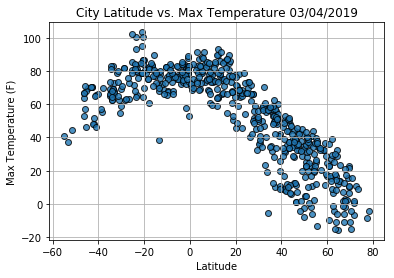

In [46]:
plt.scatter(WeatherPy_CitiesDF["Lat"], 
            WeatherPy_CitiesDF["Max Temp"], 
            data=WeatherPy_CitiesDF["Max Temp"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

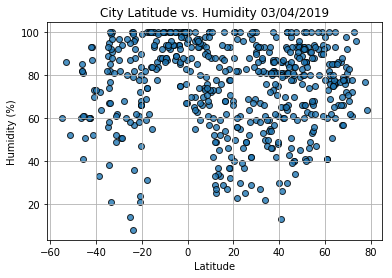

In [47]:
plt.scatter(WeatherPy_CitiesDF["Lat"], 
            WeatherPy_CitiesDF["Humidity"], 
            data=WeatherPy_CitiesDF["Humidity"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_Humid.png")

plt.show()

#### Latitude vs. Cloudiness Plot

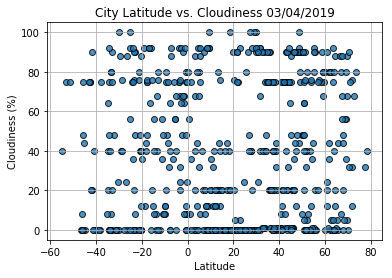

In [48]:
plt.scatter(WeatherPy_CitiesDF["Lat"], 
            WeatherPy_CitiesDF["Cloudiness"], 
            data=WeatherPy_CitiesDF["Cloudiness"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

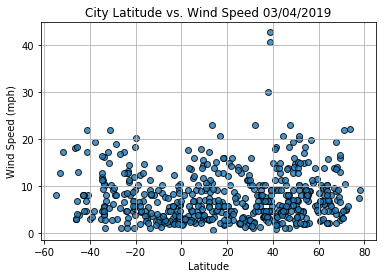

In [49]:
plt.scatter(WeatherPy_CitiesDF["Lat"], 
            WeatherPy_CitiesDF["Wind Speed"], 
            data=WeatherPy_CitiesDF["Wind Speed"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_Wind.png")

plt.show()